In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("D:\\practice_data_set\\customerchurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df1 = df.drop('customerID',axis=1)
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
df1['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
# access a row 488
df1.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [10]:
df1['TotalCharges'] = pd.to_numeric(df1['TotalCharges'],errors='coerce')

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [12]:
df1.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
df1.dropna(inplace=True)

In [14]:
df1.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df1.shape

(7032, 20)

In [16]:
# check unique value
df1['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [17]:
for i in df1:
    print(i,'=',df1[i].unique())

gender = ['Female' 'Male']
SeniorCitizen = [0 1]
Partner = ['Yes' 'No']
Dependents = ['No' 'Yes']
tenure = [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService = ['No' 'Yes']
MultipleLines = ['No phone service' 'No' 'Yes']
InternetService = ['DSL' 'Fiber optic' 'No']
OnlineSecurity = ['No' 'Yes' 'No internet service']
OnlineBackup = ['Yes' 'No' 'No internet service']
DeviceProtection = ['No' 'Yes' 'No internet service']
TechSupport = ['No' 'Yes' 'No internet service']
StreamingTV = ['No' 'Yes' 'No internet service']
StreamingMovies = ['No' 'Yes' 'No internet service']
Contract = ['Month-to-month' 'One year' 'Two year']
PaperlessBilling = ['Yes' 'No']
PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges = [29.85 56.95 53.85 ... 63.1  44.2  78

In [18]:
df1.replace('No internet service','No',inplace=True)

In [19]:
df1.replace('No phone service','No',inplace=True)

In [20]:
for i in df1:
    print(i,'=',df1[i].unique())

gender = ['Female' 'Male']
SeniorCitizen = [0 1]
Partner = ['Yes' 'No']
Dependents = ['No' 'Yes']
tenure = [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService = ['No' 'Yes']
MultipleLines = ['No' 'Yes']
InternetService = ['DSL' 'Fiber optic' 'No']
OnlineSecurity = ['No' 'Yes']
OnlineBackup = ['Yes' 'No']
DeviceProtection = ['No' 'Yes']
TechSupport = ['No' 'Yes']
StreamingTV = ['No' 'Yes']
StreamingMovies = ['No' 'Yes']
Contract = ['Month-to-month' 'One year' 'Two year']
PaperlessBilling = ['Yes' 'No']
PaymentMethod = ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges = [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges = [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn = ['No' 'Yes']


In [21]:
df1.replace({'No':0, 'Yes':1,'Female':0, 'Male':1},inplace=True)

In [22]:
final = pd.get_dummies(data=df1,drop_first=True)
final.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,True,False,True,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,True,False,True,False,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,False,True,False,False,False,True,False


In [23]:
final.shape

(7032, 24)

In [24]:
tenure0 = final[final['Churn']==0].tenure
tenure1 = final[final['Churn']==1].tenure

In [25]:
tenure0.head()

0     1
1    34
3    45
6    22
7    10
Name: tenure, dtype: int64

In [26]:
tenure1.head()

2      2
4      2
5      8
8     28
13    49
Name: tenure, dtype: int64

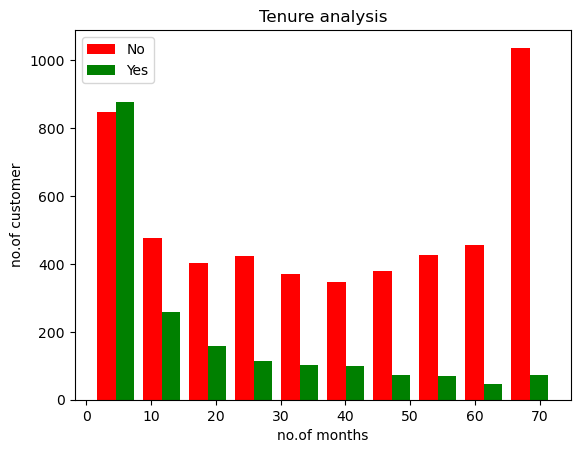

In [27]:
# analysis of Tenure according to number of months and number of customer
plt.hist([tenure0,tenure1],color=['red','green'],label=['No','Yes'])
plt.xlabel("no.of months")
plt.ylabel("no.of customer")
plt.legend()
plt.title("Tenure analysis")
plt.show()

In [28]:
monthly_charges0 = final[final['Churn']==0].MonthlyCharges	
monthly_charges1 = final[final['Churn']==1].MonthlyCharges	

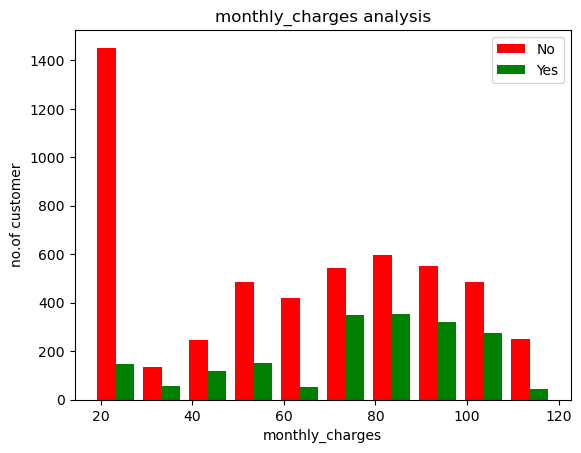

In [29]:
# analysis of monthly_charges according to number of months and number of customer
plt.hist([monthly_charges0,monthly_charges1],color=['red','green'],label=['No','Yes'])
plt.xlabel("monthly_charges")
plt.ylabel("no.of customer")
plt.legend()
plt.title("monthly_charges analysis")
plt.show()

In [30]:
final.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,True,False,True,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,True,False,False,False,False,False,True


In [31]:
X = final.drop('Churn',axis=1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,29.85,29.85,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,0,56.95,1889.50,True,False,True,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,1,53.85,108.15,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,0,42.30,1840.75,True,False,True,False,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,1,70.70,151.65,False,True,False,False,False,True,False


In [32]:
y = final.Churn
y.head

<bound method NDFrame.head of 0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64>

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
scaled = scaler.fit_transform(X)
scaled

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [36]:
scaled.shape

(7032, 23)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(scaled, y, test_size=0.20, random_state=42)

In [38]:
X_train.shape

(5625, 23)

In [39]:
X_test.shape

(1407, 23)

In [40]:
model = keras.Sequential([
        keras.layers.Dense(1,input_shape=(23,),activation='sigmoid')
])

In [41]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])

In [42]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10


176/176 [==============================] - 1s 1ms/step - loss: 0.6949 - Accuracy: 0.5746
Epoch 2/10
176/176 [==============================] - 0s 1ms/step - loss: 0.5437 - Accuracy: 0.7360
Epoch 3/10
176/176 [==============================] - 0s 1ms/step - loss: 0.5144 - Accuracy: 0.7515
Epoch 4/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4969 - Accuracy: 0.7609
Epoch 5/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4835 - Accuracy: 0.7687
Epoch 6/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4731 - Accuracy: 0.7710
Epoch 7/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4648 - Accuracy: 0.7746
Epoch 8/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4580 - Accuracy: 0.7785
Epoch 9/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4524 - Accuracy: 0.7808
Epoch 10/10
176/176 [==============================] - 0s 1ms/step - loss: 0.4477 - Accuracy: 0.78

In [44]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4371 - Accuracy: 0.7888
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4345 - Accuracy: 0.7908
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4321 - Accuracy: 0.7925
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4303 - Accuracy: 0.7943
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4284 - Accuracy: 0.7948
Epoch 6/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4269 - Accuracy: 0.7957
Epoch 7/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4256 - Accuracy: 0.7954
Epoch 8/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4244 - Accuracy: 0.7979
Epoch 9/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4234 - Accuracy: 0.7993
Epoch 10/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4225 - Accuracy: 0.8000

In [45]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4364 - Accuracy: 0.7903


[0.4363698661327362, 0.7903340458869934]

In [46]:
y_pred = model.predict(X_test)
y_pred

44/44 [==============================] - 0s 1ms/step


array([[0.02073177],
       [0.19951482],
       [0.70055175],
       ...,
       [0.09818344],
       [0.25400925],
       [0.01007742]], dtype=float32)

In [48]:
model = keras.Sequential([
        keras.layers.Dense(50,input_shape=(23,)),
        keras.layers.Dense(1,activation='sigmoid')
])

In [49]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])

In [50]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
176/176 [==============================] - 1s 2ms/step - loss: 0.4564 - Accuracy: 0.7806
Epoch 2/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4237 - Accuracy: 0.7995
Epoch 3/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4195 - Accuracy: 0.8012
Epoch 4/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4178 - Accuracy: 0.8057
Epoch 5/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4170 - Accuracy: 0.8027
Epoch 6/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4174 - Accuracy: 0.8050
Epoch 7/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4168 - Accuracy: 0.8048
Epoch 8/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4167 - Accuracy: 0.8037
Epoch 9/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4158 - Accuracy: 0.8052
Epoch 10/10
176/176 [==============================] - 0s 2ms/step - loss: 0.4156 - Accuracy: 0.8044

In [51]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4366 - Accuracy: 0.7910


[0.4365544021129608, 0.7910447716712952]

In [52]:
y_pred = model.predict(X_test)

44/44 [==============================] - 0s 2ms/step


In [57]:
pred_y = []
for i in y_pred:
    if i > 0.5:
        pred_y.append(1)
    else:
        pred_y.append(0)

In [58]:
pred_y

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [59]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=pred_y)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[918, 115],
       [179, 195]])>

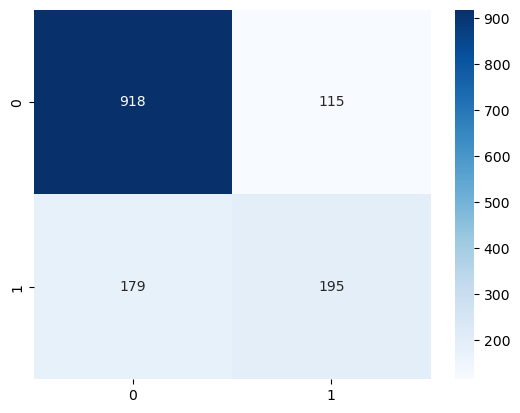

In [61]:
# plot a heatmap and change it's color using cmap 
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.show()

In [64]:
final['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [ ]:
# Synthetic Minority Over-sampling TEchnique (SMOTE)
# oversampling by majority
# under sampling by minority